In [4]:
import pandas as pd; pd.set_option('display.max_columns', None)
import glob
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import sys
sys.path.append('../scripts/')
from Acompanhamento import *

In [5]:
METODO = 'back_home_v2'
TARGET = 'Back_Home'
ODDS = 'Odds_H'
SPREAD = 1
STAKE = 1


# Dados de backtest
wr = 62
roi = 11.12
drawdown = -6.89
med_gain = 0.80
med_loss = -1.00
ev = 0.12

BACKTEST -----------------------
WR: 62.00% | ROI: 11.12% | Drawdown: -6.89%
MedGain: 0.80 | MedLoss: -1.00 | EV: 0.06

REALIDADE -----------------------
WR: 46.34% | ROI: -13.17% | Drawdown: -33.80%
MedGain: 0.87 | MedLoss: -1.00 | EV: -0.13

Profit: -26.99 | Entradas: 205
Dias: 6 (6 totais)


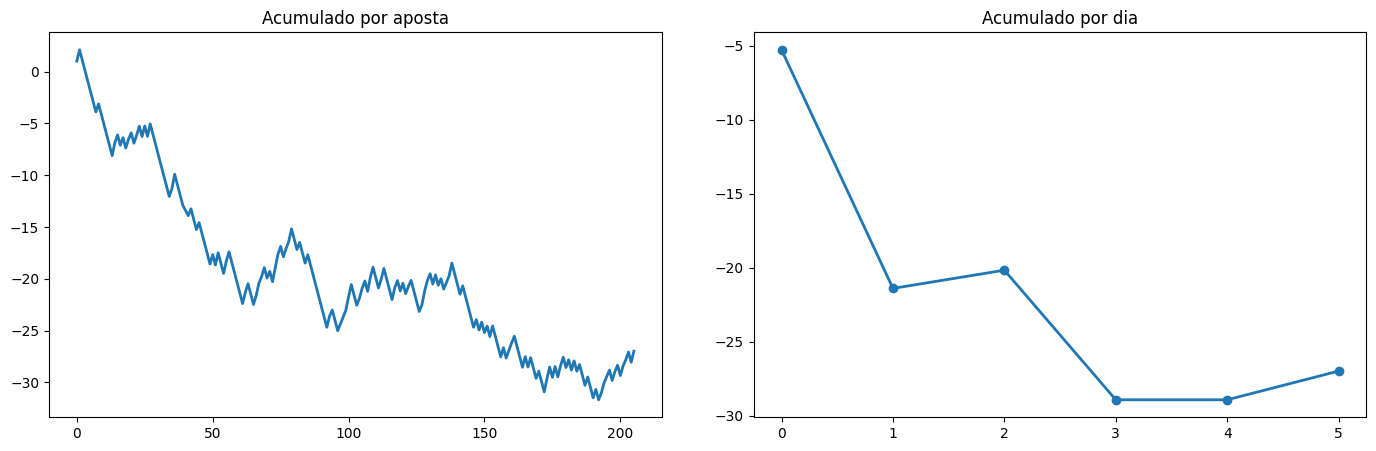


Jogos -------------------------------------


,Date,Home,Away,Home_Pts,Away_Pts,Odds_H,Resultado,Profit,Acumulado
0,2023-11-23,Zob Ahan,Kalleh,77,67,2.01,green,1.01,1.01
1,2023-11-23,Memphis,Arkansas,84,79,2.10,green,1.10,2.11
2,2023-11-23,North Carolina,Villanova,81,83,1.71,red,-1.00,1.11
3,2023-11-23,Boston College,Loyola (Ill).,68,71,1.67,red,-1.00,0.11
4,2023-11-23,Unics Kazan,CSKA Moscow,66,79,1.74,red,-1.00,-0.89
...,...,...,...,...,...,...,...,...,...
201,2023-11-28,Syracuse,LSU,80,57,1.91,green,0.91,-28.44
202,2023-11-28,Norfolk State,William & Mary,96,62,1.61,green,0.61,-27.83
203,2023-11-28,Al Gharafa,Al Wakrah,98,76,1.76,green,0.76,-27.07
204,2023-11-28,Ourense,Tizona Burgos,72,79,1.92,red,-1.00,-28.07



Dias --------------------------------------


,Date,Total_Profit,Qtd_Games,Acumulado
0,2023-11-23,-5.27,24,-5.27
1,2023-11-24,-16.13,36,-21.40
2,2023-11-25,1.23,69,-20.17
3,2023-11-26,-8.76,41,-28.93
4,2023-11-27,0.00,14,-28.93
5,2023-11-28,1.94,21,-26.99


In [6]:
df_all = pd.DataFrame()
dias = glob.glob('../apostas_do_dia/*')

for dia in dias:
    dia = dia.split('\\')[1]
    dia = dia.split('.')[0]
    caminho = glob.glob(f'../apostas_do_dia/{dia}/*{METODO}*')
    if len(caminho) == 0:
        continue
    caminho = caminho[0]
    df = pd.read_csv(caminho)
    df_all = pd.concat([df_all, df])

temp = pd.read_csv('../data/Entire_Season.csv')
df_all = pd.merge(df_all, temp[['Date', 'Home', 'Away', 'Home_Pts', 'Away_Pts']], on=['Date', 'Home', 'Away'], how='left')
df_all = df_all.dropna(subset=['Home_Pts', 'Away_Pts'])
df_all['Home_Pts'] = df_all['Home_Pts'].astype(int)
df_all['Away_Pts'] = df_all['Away_Pts'].astype(int)

df_all.loc[(df_all['Home_Pts'] < df_all['Away_Pts']), TARGET] = 0
df_all.loc[(df_all['Home_Pts'] >= df_all['Away_Pts']), TARGET] = 1

df_all.loc[(df_all[TARGET] == 0), 'Profit'] = - STAKE
df_all.loc[(df_all[TARGET] == 1), 'Profit'] = ((df_all[ODDS] * SPREAD) - 1) * STAKE
df_all['Profit'] = df_all['Profit'].round(2)

print('BACKTEST -----------------------')
print(f'WR: {wr:.2f}% | ROI: {roi:.2f}% | Drawdown: {drawdown:.2f}%')
print(f'MedGain: {med_gain:.2f} | MedLoss: {med_loss:.2f} | EV: {ev:.2f}')

print('\nREALIDADE -----------------------')
df_odds, df_by_day = get_results(df_all, TARGET, ODDS)

print('\nJogos -------------------------------------')
display(df_odds)
print('\nDias --------------------------------------')
display(df_by_day)